## Running psi4 to populate the MolecularData class

The module run_psi4.py provides a user-friendly way of running psi4 calculations in FermiLib. The basic idea is that once one generates a MolecularData instance, one can then call psi4 with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to compute things about the molecule, update the MolecularData object, and save results of the calculation. The most common calculations users will want in FermiLib would probably be self-consistent field (aka Hartree-Fock calculations). Our code uses these "SCF" calculations compute orbitals, integrals, Hartree-Fock energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers, CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. 
Note that the "delete_input" and "delete_output" options indicate whether to save automatically generated psi4 input files or not.

To use this plugin, you will need to personally download psi4. Python code in psi4_template instructs psi4 (not python) to load the MolecularData object, populate it with information from calculations and then save the MolecularData object as an HDF5. The module run_psi4 uses subprocess to actually run_psi4 and then loads the pickled MolecularData. Let us look at a simple example where we compute the energy of H$_2$ at various bond lengths.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. If a particular calculation is not converging it is probably necessary to change some of the SCF options set in psi4_template. See the Psi4 documentation for more information or consult and electronic structure theory expert.


At bond length of 0.2 Bohr, molecular hydrogen has:
Hartree-Fock energy of 0.164155877939 Hartree.
MP2 energy of 0.159023858973 Hartree.
FCI energy of 0.157482124142 Hartree.
Nuclear repulsion energy between protons is 2.64588604295 Hartree.
Spatial orbital 0 has energy of -0.85884365079 Hartree.
Spatial orbital 1 has energy of 1.57244949551 Hartree.

At bond length of 0.4 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.904395312328 Hartree.
MP2 energy of -0.911467754695 Hartree.
FCI energy of -0.914149708214 Hartree.
Nuclear repulsion energy between protons is 1.32294302147 Hartree.
Spatial orbital 0 has energy of -0.745246447905 Hartree.
Spatial orbital 1 has energy of 1.16777664803 Hartree.

At bond length of 0.6 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.10117934458 Hartree.
MP2 energy of -1.11137987752 Hartree.
FCI energy of -1.11628600783 Hartree.
Nuclear repulsion energy between protons is 0.881962014317 Hartree.
Spatial orbital 0 has energy of -0.640927365

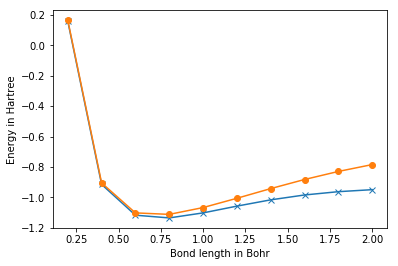

In [1]:
from fermilib.utils import MolecularData
from fermilibpluginpsi4 import run_psi4

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.2
n_points = 10

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run Psi4.
    molecule = run_psi4(molecule,
                        run_scf=run_scf,
                        run_mp2=run_mp2,
                        run_cisd=run_cisd,
                        run_ccsd=run_ccsd,
                        run_fci=run_fci)

    # Print out some results of calculation.
    print('\nAt bond length of {} Bohr, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in Bohr')
plt.show()